In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
gfi= pd.read_excel(r'/content/gfi.xlsx')

In [ ]:
gfi.rename(columns = {'Unnamed: 0':'Year'}, inplace = True)

In [ ]:
gfi.set_index('Year', inplace=True)

In [ ]:
gfi

,Green Credit,Green Securities,Green Investment1,Green Investment 2
Year,,,,
2011,402653.83,688662.52,40.00,1500
2012,788501.40,969829.12,42.00,1676
2013,926211.91,1189667.10,57.72,1366
2014,1094724.35,1646633.94,57.72,2296
2015,1296977.64,1770653.43,52.00,1656
2016,1613891.38,1866861.40,50.00,1790
2017,1971634.98,2705363.32,65.00,1545
2018,2264898.66,3372310.26,74.30,2390
2019,2619541.91,3922412.36,100.00,4115


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
gfi = scaler.fit_transform(gfi)

In [ ]:
gfi=pd.DataFrame(gfi)

In [ ]:
V = gfi.cov()
V

,0,1,2,3
0,1.100000,1.077439,1.035992,0.886001
1,1.077439,1.100000,1.034992,0.877852
2,1.035992,1.034992,1.100000,0.983655
3,0.886001,0.877852,0.983655,1.100000


In [ ]:
from numpy import linalg as LA
w,v=LA.eig(V)

In [ ]:
w

array([4.05161332, 0.28114452, 0.02239383, 0.04484833])

In [ ]:
v

array([[ 0.50680493,  0.39517363,  0.69645087,  0.31928474],
       [ 0.50572004,  0.42105261, -0.7150642 ,  0.23589222],
       [ 0.51301767, -0.05352369,  0.04915542, -0.85529634],
       [ 0.47350699, -0.81467031, -0.03497318,  0.33298692]])

In [ ]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 1)
 
gfi = pca.fit_transform(gfi) 
explained_variance = pca.explained_variance_ratio_

In [ ]:
gfi=pd.DataFrame(gfi, columns=['gfi'])

In [ ]:
gfi

,gfi
0,-2.348503
1,-1.928509
2,-1.575789
3,-0.903857
4,-1.201694
5,-0.985304
6,-0.321262
7,0.653215
8,2.433433
9,3.210694


In [ ]:
econ = pd.read_excel(r'/content/econ.xlsx')

In [ ]:
econ.rename(columns = {'Unnamed: 0':'Year'}, inplace = True)
econ.set_index('Year', inplace=True)
econ

,Per capita GDP,GCF/LAB,FEE/LAB,Per capita GDP of previous year
Year,,,,
2011,11.624029,-4.611653,-6.922843,11.564335
2012,11.614381,-4.645624,-6.855354,11.624029
2013,11.618527,-4.709747,-6.761471,11.614381
2014,11.700584,-4.654079,-6.583070,11.618527
2015,11.720710,-4.667960,-6.503299,11.700584
2016,11.796818,-4.600960,-6.503299,11.720710
2017,11.930566,-4.465269,-6.415733,11.796818
2018,11.938610,-4.418646,-6.358238,11.930566
2019,11.989377,-4.387980,-6.263746,11.938610


In [ ]:
econ['gfi']=gfi['gfi'].to_numpy()
econ

,Per capita GDP,GCF/LAB,FEE/LAB,Per capita GDP of previous year,gfi
Year,,,,,
2011,11.624029,-4.611653,-6.922843,11.564335,-2.348503
2012,11.614381,-4.645624,-6.855354,11.624029,-1.928509
2013,11.618527,-4.709747,-6.761471,11.614381,-1.575789
2014,11.700584,-4.654079,-6.583070,11.618527,-0.903857
2015,11.720710,-4.667960,-6.503299,11.700584,-1.201694
2016,11.796818,-4.600960,-6.503299,11.720710,-0.985304
2017,11.930566,-4.465269,-6.415733,11.796818,-0.321262
2018,11.938610,-4.418646,-6.358238,11.930566,0.653215
2019,11.989377,-4.387980,-6.263746,11.938610,2.433433


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
econ = scaler.fit_transform(econ)

In [ ]:
econ=pd.DataFrame(econ,columns=['Per capita GDP',	'GCF/LAB',	'FEE/LAB',	'Per capita GDP of previous year',	'gfi'])

In [ ]:
econ.corr()

,Per capita GDP,GCF/LAB,FEE/LAB,Per capita GDP of previous year,gfi
Per capita GDP,1.000000,0.368992,0.834378,0.890437,0.738973
GCF/LAB,0.368992,1.000000,0.659919,0.553212,0.702006
FEE/LAB,0.834378,0.659919,1.000000,0.914594,0.918779
Per capita GDP of previous year,0.890437,0.553212,0.914594,1.000000,0.922194
gfi,0.738973,0.702006,0.918779,0.922194,1.000000


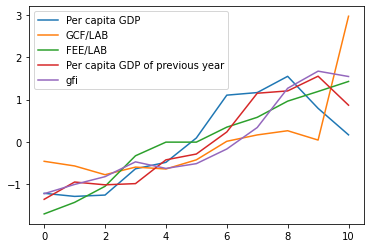

In [ ]:
econ.plot()
plt.show()

In [ ]:
econ.columns

Index(['Per capita GDP', 'GCF/LAB', 'FEE/LAB',
       'Per capita GDP of previous year', 'gfi'],
      dtype='object')

In [ ]:
X= econ[['GCF/LAB','FEE/LAB','Per capita GDP of previous year', 'gfi']]
X

,GCF/LAB,FEE/LAB,Per capita GDP of previous year,gfi
0,-0.458065,-1.701663,-1.356535,-1.223696
1,-0.567798,-1.428727,-0.947856,-1.004856
2,-0.774930,-1.049045,-1.013912,-0.821071
3,-0.595108,-0.327563,-0.985524,-0.470958
4,-0.639947,-0.004955,-0.423751,-0.626147
5,-0.423522,-0.004955,-0.285962,-0.513396
6,0.014788,0.349180,0.235081,-0.167395
7,0.165392,0.581697,1.150741,0.340360
8,0.264450,0.963841,1.205813,1.267949
9,0.044091,1.192729,1.553375,1.672944


In [ ]:
Y=econ[['Per capita GDP']]
Y

,Per capita GDP
0,-1.214512
1,-1.287536
2,-1.256154
3,-0.635122
4,-0.482798
5,0.093207
6,1.105455
7,1.166336
8,1.550560
9,0.793475


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,random_state=42)

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=25)
model.fit(X_train,y_train)

Ridge(alpha=25)

In [ ]:
model.coef_

array([[0.08053972, 0.15362577, 0.17428593, 0.12868362]])

In [ ]:
model.score(X_train,y_train)

0.5572604804580931

In [ ]:
model.score(X_test,y_test)

0.5342971805224466

In [ ]:
(model.coef_)*1000

array([[ 80.53972186, 153.62577002, 174.2859264 , 128.68362207]])